In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

In [2]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Config file not found!")

In [3]:
df = pd.read_csv(config["data"]["raw"])
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [4]:
data = df.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [6]:
data.dtypes

CDPHId                      int64
ProductName                object
CSFId                     float64
CSF                        object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
ChemicalCount               int64
dtype: object

Some columns have a different type as their actually values and we need to change them.

In [7]:
def change_dtype(df, col_list, dtype):
    """
    Change the data type of the given columns.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns' data types are to be changed.
    col_list (list of str): The names of the columns to change.
    dtype (str or type): The new data type.
    
    Returns:
    pd.DataFrame: The DataFrame with changed data types.
    """
    for col in col_list:
        df[col] = df[col].astype(dtype)
    return df


In [8]:
data = change_dtype(data, ['InitialDateReported', 'MostRecentDateReported', 'ChemicalCreatedAt', 'ChemicalUpdatedAt'], 'datetime64[ns]')

In [9]:
data = change_dtype(data, ['CDPHId', 'PrimaryCategoryId','CompanyId'], 'object')

In [10]:
data.dtypes

CDPHId                            object
ProductName                       object
CSFId                            float64
CSF                               object
CompanyId                         object
CompanyName                       object
BrandName                         object
PrimaryCategoryId                 object
PrimaryCategory                   object
SubCategoryId                      int64
SubCategory                       object
CasId                              int64
CasNumber                         object
ChemicalId                         int64
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate                  object
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved               object
ChemicalCount                      int64
dtype: object

In [11]:
data.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33973
CSF                        34398
CompanyId                      0
CompanyName                    0
BrandName                    227
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
dtype: int64

In [12]:
data.isnull().sum()/len(data)

CDPHId                    0.000000
ProductName               0.000000
CSFId                     0.296358
CSF                       0.300065
CompanyId                 0.000000
CompanyName               0.000000
BrandName                 0.001980
PrimaryCategoryId         0.000000
PrimaryCategory           0.000000
SubCategoryId             0.000000
SubCategory               0.000000
CasId                     0.000000
CasNumber                 0.056492
ChemicalId                0.000000
ChemicalName              0.000000
InitialDateReported       0.000000
MostRecentDateReported    0.000000
DiscontinuedDate          0.887294
ChemicalCreatedAt         0.000000
ChemicalUpdatedAt         0.000000
ChemicalDateRemoved       0.973961
ChemicalCount             0.000000
dtype: float64

Here we can see that 6 columns have missing values. The columns with the highest frequency of missing values are ChemicalDateRemoved with 111650 missing values out of 114635(97%) values in total and DiscontinuedDate with 101715(88%) missing values out of 114635 values in total.
I will drop the columns ChemicalDateRemoved and DiscontinuedDate.

In [13]:
data.drop(['ChemicalDateRemoved', 'DiscontinuedDate'], axis=1, inplace=True)

In [14]:
data.shape

(114635, 20)

The column BrandName has a pretty small number of missing values and we will replace those with forward fill:

In [15]:
data['BrandName'].fillna(method='ffill', inplace=True)

After analyzing the columns of my dataframe I realized that I don't need the other three columns (CSFId, CSF, CasNumber) which contain missing values. For this reason I will drop them too and I will have a dataframe without missing values and columns which are not important for my further analyses. 

In [16]:
data.drop(['CSFId', 'CSF', 'CasNumber'], axis=1, inplace=True)

In [17]:
data.shape

(114635, 17)

In [18]:
data.isnull().sum()

CDPHId                    0
ProductName               0
CompanyId                 0
CompanyName               0
BrandName                 0
PrimaryCategoryId         0
PrimaryCategory           0
SubCategoryId             0
SubCategory               0
CasId                     0
ChemicalId                0
ChemicalName              0
InitialDateReported       0
MostRecentDateReported    0
ChemicalCreatedAt         0
ChemicalUpdatedAt         0
ChemicalCount             0
dtype: int64

In [19]:
data.dtypes

CDPHId                            object
ProductName                       object
CompanyId                         object
CompanyName                       object
BrandName                         object
PrimaryCategoryId                 object
PrimaryCategory                   object
SubCategoryId                      int64
SubCategory                       object
CasId                              int64
ChemicalId                         int64
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalCount                      int64
dtype: object

In [20]:
data.nunique()

CDPHId                    36972
ProductName               33716
CompanyId                   635
CompanyName                 606
BrandName                  2713
PrimaryCategoryId            13
PrimaryCategory              13
SubCategoryId                92
SubCategory                  89
CasId                       134
ChemicalId                58079
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalCount                10
dtype: int64

The columns PrimaryCategoryId and PrimaryCategory have the same number of unique values which means that I can drop one of them.

In [21]:
data['PrimaryCategoryId'].unique()

array([44, 18, 59, 74, 106, 6, 90, 12, 111, 32, 68, 82, 1], dtype=object)

In [22]:
data['PrimaryCategory'].unique()

array(['Makeup Products (non-permanent)',
       'Hair Care Products (non-coloring)', 'Nail Products',
       'Personal Care Products', 'Sun-Related Products', 'Bath Products',
       'Skin Care Products ', 'Fragrances',
       'Tattoos and Permanent Makeup', 'Hair Coloring Products',
       'Oral Hygiene Products', 'Shaving Products', 'Baby Products'],
      dtype=object)

In [23]:
data.drop(['PrimaryCategoryId'], axis=1, inplace=True)

In [24]:
#data['SubCategoryId'].unique()

In [25]:
#data['SubCategory'].unique()

In [26]:
def check_id_counts(data, subcategory_col, id_col):
    """
    Print the number of unique IDs for each unique subcategory.

    Parameters:
    df (pd.DataFrame): The DataFrame to operate on.
    subcategory_col (str): The name of the column containing the subcategories.
    id_col (str): The name of the column containing the IDs.
    """
    id_counts = {subcat: len(df.loc[df[subcategory_col] == subcat, id_col].unique())
                 for subcat in df[subcategory_col].unique()}
    for subcat, count in id_counts.items():
        print(f'{subcat}: {count}')

In [27]:
check_id_counts(data, 'SubCategory', 'SubCategoryId')

Lip Color - Lipsticks, Liners, and Pencils: 1
Hair Shampoos (making a cosmetic claim) : 2
Eyeliner/Eyebrow Pencils: 1
Lip Gloss/Shine: 1
Eye Shadow: 1
Artificial Nails and Related Products: 1
Mascara/Eyelash Products: 1
Hand Cleansers and Sanitizers: 1
Sunscreen (making a cosmetic claim) : 1
UV Gel Nail Polish: 1
Basecoats and Undercoats: 1
Scrubs and Exfoliants: 1
Foundations and Bases: 1
Nail Polish and Enamel: 1
Anti-Wrinkle/Anti-Aging Products (making a cosmetic claim): 1
Skin Moisturizers (making a cosmetic claim): 1
Acne Products (making a cosmetic claim): 1
Facial Masks: 1
Lip Balm (making a cosmetic claim): 1
Skin Astringent (making a cosmetic claim): 1
Skin Bleaching (making a cosmetic claim) : 1
Perfumes - Solids and Powders: 1
Blushes : 1
Bubble and Foam Bath Products: 1
Skin Cleansers: 1
Body Washes and Soaps: 1
Rouges: 1
Face Powders: 1
Skin Toner (making a cosmetic claim): 1
Tattoos and Permanent Makeup: 1
Powders (excluding aftershave, baby powder, and makeup face powder

Here we have 3 subcategories who have each two Ids. I will drop the SubCategoryId column and keep the SubCategory column to later use it for my questions.

In [28]:
data.drop(['SubCategoryId'], axis=1, inplace=True)

The same issue appears for the columns CompanyId and CompanyName where the number of IDs is larger than the number of company names. I will drop here too the Id column.

In [29]:
data.drop(['CompanyId'], axis=1, inplace=True)

In [31]:
data.shape

(114635, 14)

In [30]:
data.nunique()

CDPHId                    36972
ProductName               33716
CompanyName                 606
BrandName                  2713
PrimaryCategory              13
SubCategory                  89
CasId                       134
ChemicalId                58079
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalCount                10
dtype: int64

There are 33716 different cosmetic products identified in the retail consumer market represented and sold by 2713 Brands. 

Each product is categorized among 13 primary categories:

In [33]:
category_frequency = data['PrimaryCategory'].value_counts()
print(category_frequency)

PrimaryCategory
Makeup Products (non-permanent)      75827
Nail Products                        15347
Skin Care Products                    7683
Sun-Related Products                  4939
Bath Products                         3466
Hair Coloring Products                2061
Hair Care Products (non-coloring)     1620
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             654
Oral Hygiene Products                  525
Shaving Products                       222
Baby Products                           49
Name: count, dtype: int64


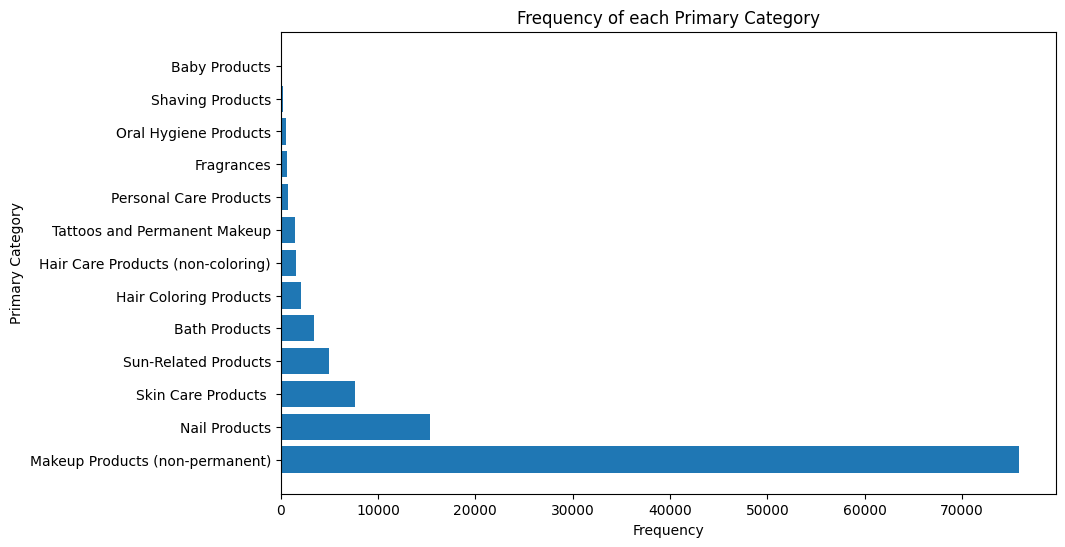

In [36]:
plt.figure(figsize=(10,6))
plt.barh(category_frequency.index, category_frequency.values)
plt.title('Frequency of each Primary Category')
plt.xlabel('Frequency')
plt.ylabel('Primary Category')
plt.show()